In [1]:
import hsi_viewer as hv
import hsi_layers_viewer as hlv
import hsi_viewer_2 as hv2
import spectral
import numpy as np
import importlib

# Viewing an image

In [3]:
#fname = 'C:/Users/wb8by/Documents/GitHub/Machine-Learning-for-Spectral-Imaging/Book Modules/spectral_images/Microscene_Polymers/reflectance_image_polymers'
fname = 'C:/spectral_data/Morven_08_20_2024_Fragements_For Bill/lower 01_full spectra_multi_or'
#fname = 'C:/Users/wb8by/Downloads/Sample093024/ENVI/008_0502-1448_ref_rect'

im = spectral.envi.open(fname+'.hdr', fname)
wl = np.asarray(im.bands.centers)
im.Arr = im.load()
print(f'Shape of ImArr = {im.Arr.shape}')
im.List = np.reshape(im.Arr, (im.nrows*im.ncols, im.nbands))
print(f'Shape of imList = {im.List.shape}')

Shape of ImArr = (2252, 2624, 343)
Shape of imList = (5909248, 343)


In [4]:
# viewer showing image and layers
importlib.reload(hv)
hv.viewer(im)

x,y = [793,333]
x,y = [1049,149]


In [10]:
im.ListDAta = im.List[im.List[:,50]>0]
mu = np.mean(im.ListDAta, axis=0)

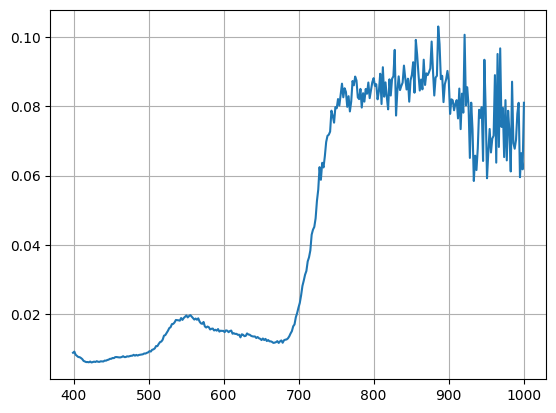

In [15]:
import matplotlib.pyplot as plt
plt.plot(wl, mu)
plt.grid(True)

In [24]:
import pyqtgraph as pg

s = im.Arr[1040,1310,:].flatten()

specPlot = pg.plot(wl, mu, pen='r', name='Image Mean')
specPlot.plot(wl, s, pen='g', name='Pixel [1040,1310]')
specPlot.showGrid(True, True)
specPlot.setLabels(title='Image Spectra', bottom='Wavelength')
specPlot.addLegend()
pg.exec() 

0

In [ ]:
lib = envi.open('spectral_libraries/UPWINS_4_16_2024.hdr')
plotWidget = pg.plot(title="Three Spectra")
i = 0
for x,y in [[923,1590],[734,1349],[923,1593]]:
    i = i + 1
    spec = np.squeeze(im.Arr[x,y,:])
    spec = 0.5*spec/spec[200]
    plotWidget.plot(wl, spec, pen=(i,4))  ## setting pen=(i,3) automaticaly creates three different-colored pens
idx = 50
i = i + 1
plotWidget.plot(lib.bands.centers, lib.spectra[i], pen=(i,4), name=lib.names[i])
plotWidget.showGrid(True, True)
plotWidget.addLegend()
pg.exec()